**Prosjektoppgave PY1010-1 24H Grunnleggende programmering med Python**

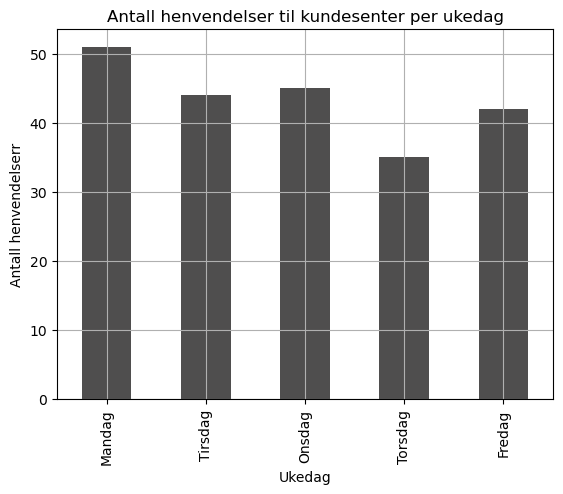

Svaret i oppgave c) Den lengste samtalentil kundeseneteret varte i 0 days 00:11:28, mens den korteste samtalen varte i 0 days 00:00:59
svaret i oppgave d) I gjennomsnitt varte en samtale til kundersenteret : 00:06:40
svaret i oppgave e)


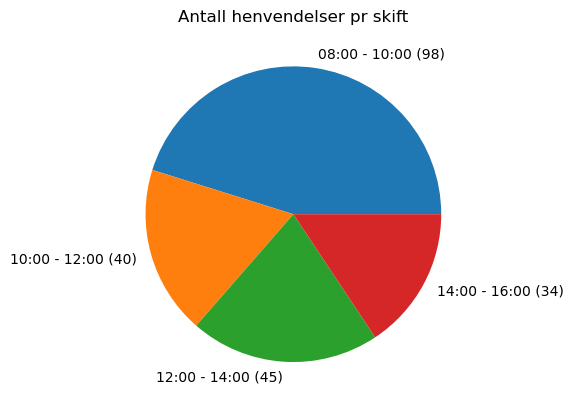

Svar på oppgave f)
 Det var totalt 43 henvendelser som ga score. Av disse var 28 positive og 10 negative 
 Følgende var 5 nøytrale. Det gir en NPS score på 41.9%


In [5]:
#Henter nøvvendige biblioteker

import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import timedelta

#Del a) Skriv et program som leser inn filen ‘support_uke_24.xlsx’ og lagrer data fra kolonne 1
#i en array med variablenavn ‘u_dag’, dataen i kolonne 2 lagres i arrayen ‘kl_slett’, data i
#kolonne 3 lagres i arrayen ‘varighet’ og dataen i kolonne 4 lagres i arrayen ‘score’.

df = pd.read_excel(r"C:\Users\enorgreen\python\Skole\support_uke_24.xlsx") 
#print(df)

u_dag = df['Ukedag'].values 
kl_slett = df['Klokkeslett'].values
varighet = df['Varighet'].values
tilfredshet = df['Tilfredshet'].values

#kontroll
#print(u_dag)
#print(kl_slett)
#print(varighet)
#print(tilfredshet)

#Del b) Skriv et program som finner antall henvendelser for hver de 5 ukedagene. Resultatet
#visualiseres ved bruk av et søylediagram (stolpediagram).

df['Ukedag'].value_counts() #Teller forekomster på ukedager
#print(df['Ukedag'].value_counts()) 

df['Ukedag'].value_counts().loc[['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag']].plot(kind='bar', color = "#4f4e4e" )
plt.xlabel('Ukedag')
plt.ylabel('Antall henvendelserr')
plt.title('Antall henvendelser til kundesenter per ukedag')
plt.grid
plt.grid(True)
plt.show()


#Del c) Skriv et program som finner minste og lengste samtaletid som er loggført for uke 24.
#Svaret skrives til skjerm med informativ tekst.

df['Varighet'] = pd.to_timedelta(df['Varighet'])
lengste_henvendelse = df['Varighet'].max()
korteste_henvendelse = df['Varighet'].min()
print(f"Svaret i oppgave c) Den lengste samtalentil kundeseneteret varte i {lengste_henvendelse}, mens den korteste samtalen varte i {korteste_henvendelse}" )

#Del d) KREVENDE: Skriv et program som regner ut gjennomsnittlig samtaletid basert på alle
#henvendelser i uke 24.

add_time = df["Varighet"].astype(str) #endre datatype til tekststreng
#print(add_time)

#Lager en funksjon som konverterer til timedelta

def convert(time_str):
    hrs, mins, secs = (int(unit) for unit in time_str.split(':'))
    return timedelta(hours=hrs, minutes=mins, seconds=secs)

total = df["Varighet"].sum()
gjennomsnittstid = total/ len(add_time)
#print(gjennomsnittstid) #kontroll

total_seconds = gjennomsnittstid.total_seconds()
hours, seconds = divmod(total_seconds, 3600)
minutes, seconds = divmod(seconds, 60)

# Print gjennomsnittlig samtaletid
gjennomsnittlig_samtaletid =(f'svaret i oppgave d) I gjennomsnitt varte en samtale til kundersenteret : {int(hours):02}:{int(minutes):02}:{int(seconds):02}')
print(gjennomsnittlig_samtaletid)

#Del e) Supportvaktene i MORSE er delt inn i 2-timers bolker: kl 08-10, kl 10-12, kl 12-14 og kl
#14-16. Skriv et program som finner det totale antall henvendelser supportavdelingen mottok
#for hver av tidsrommene 08-10, 10-12, 12-14 og 14-16 for uke 24. Resultatet visualiseres ved
#bruk av et sektordiagram (kakediagram).

#Gjør om klokkeslett til date time
df["Klokkeslett"] = pd.to_datetime(df["Klokkeslett"], format="%H:%M:%S").dt.time
#print(klokkeslett)

skift_intervaller = [
    ("08:00", "10:00"),
    ("10:00", "12:00"),
    ("12:00", "14:00"),
    ("14:00", "16:00")
]

def tell_intervall(start, slutt):
    start = pd.to_datetime(start).time()
    slutt = pd.to_datetime(slutt).time()
    return ((df["Klokkeslett"] >= start) & (df["Klokkeslett"] < slutt)).sum()

resultat = {f"{start} - {slutt}": tell_intervall(start, slutt) for start, slutt in skift_intervaller}
#print(resultat)
#print(resultat.values())

labels = list(resultat.keys())
verdier = list(resultat.values())

#plt.grid(True)
print(f'svaret i oppgave e)')
plt.pie(verdier, labels=[f"{label} ({verdi})" for label, verdi in zip(labels, verdier)])
plt.title('Antall henvendelser pr skift')
plt.show()

#Del f) Kundens tilfredshet loggføres som tall fra 1-10 hvor 1 indikerer svært misfornøyd og
#10 indikerer svært fornøyd. Disse tilbakemeldingene skal så overføres til NPS-systemet (Net
#Promoter Score)

#NPS-systemet er konstruert på følgende måte:
#Score 1-6 oppfattes som at kunden er negativ (vil trolig ikke anbefale MORSE til andre).
#Score 7-8 oppfattes som et nøytralt svar.
#Score 9-10 oppfattes som at kunden er positiv (vil trolig anbefale MORSE til andre).
#Supportavdelingens NPS beregnes som et tall, prosentandelen positive kunder minus
#prosentandelen negative kunder. Ved en formel kan dette gis slik:
#NPS = % positive kunder - % negative kunder
#Et eksempel på utregning av NPS er gitt i figuren under.
#Kilde: https://www.blueprnt.com/2018/09/17/net-promoter-score/
#Lag et program som regner ut supportavdelings NPS og skriver svaret til skjerm. Merk:
#Kunder som ikke har gitt tilbakemelding på tilfredshet, skal utelates fra utregningene.

kundetilfredshet = df['Tilfredshet'].dropna() #fjerner NaN rader fra dataframen
#print(kundetilfredshet) #kontroll

#teller antall positive, nøytrale og negative henvendelser
kundetilfredshet_positiv = len(kundetilfredshet[kundetilfredshet >= 9])
kundetilfredshet_nøytral = len(kundetilfredshet[(kundetilfredshet >= 7) & (kundetilfredshet <= 8)])
kundetilfredshet_negativ = len(kundetilfredshet[kundetilfredshet <= 6])
kundetilfredshet_totalt = len(kundetilfredshet)

nps = (kundetilfredshet_positiv / kundetilfredshet_totalt) * 100 - \
      (kundetilfredshet_negativ / kundetilfredshet_totalt) * 100

print(
    f"Svar på oppgave f)\n"
    f" Det var totalt {kundetilfredshet_totalt} henvendelser som ga score. Av disse var {kundetilfredshet_positiv} positive og {kundetilfredshet_negativ} negative \n"
    f" Følgende var {kundetilfredshet_nøytral} nøytrale. Det gir en NPS score på {nps:.1f}%")